# <font color=green>TP FINAL - ALGORITHMES D'APPRENTISSAGE SUPERVISÉ</font>

- Ricardo Vallejo
- Yulia Kalugina

#  <font color=blue>1.  LOAD DATA</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal.head(5)

id  sex  patient_type  entry_date date_symptoms   date_died  intubed  \
0  16169f    2             1  04-05-2020    02-05-2020  9999-99-99       97   
1  1009bf    2             1  19-03-2020    17-03-2020  9999-99-99       97   
2  167386    1             2  06-04-2020    01-04-2020  9999-99-99        2   
3  0b5948    2             2  17-04-2020    10-04-2020  9999-99-99        2   
4  0d01b5    1             2  13-04-2020    13-04-2020  22-04-2020        2   

   pneumonia  age  pregnancy  ...  inmsupr  hypertension  other_disease  \
0          2   27         97  ...        2             2              2   
1          2   24         97  ...        2             2              2   
2          2   54          2  ...        2             2              2   
3          1   30         97  ...        2             2              2   
4          2   60          2  ...        2             1              2   

   cardiovascular  obesity  renal_chronic  tobacco  contact_other_covid  \
0               2        2              2        2                    2   
1               2        2              2        2                   99   
2               2        1              2        2                   99   
3               2        2              2        2                   99   
4               1        2              2        2                   99   

   covid_res  icu  
0          1   97  
1          1   97  
2          1    2  
3          1    2  
4          1    2  

[5 rows x 23 columns]

## 1.1. LOAD METADA

In [2]:
cat_si_no = pd.read_excel("Catalogs.xlsx", 'Catálogo SI_NO')
pd.set_option('display.max_rows', None)
cat_si_no.head(5)

CLAVE      DESCRIPCIÓN
0      1              SI 
1      2              NO 
2     97        NO APLICA
3     98        SE IGNORA
4     99  NO ESPECIFICADO

In [3]:
cat_pacient_type = pd.read_excel("Catalogs.xlsx", 'Catálogo TIPO_PACIENTE')
pd.set_option('display.max_rows', None)
cat_pacient_type.head(5)

CLAVE      DESCRIPCIÓN
0      1      AMBULATORIO
1      2    HOSPITALIZADO
2     99  NO ESPECIFICADO

In [4]:
cat_sex = pd.read_excel("Catalogs.xlsx", 'Catálogo SEXO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

CLAVE      DESCRIPCIÓN
0      1            MUJER
1      2           HOMBRE
2     99  NO ESPECIFICADO

In [5]:
cat_result = pd.read_excel("Catalogs.xlsx", 'Catálogo RESULTADO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

CLAVE      DESCRIPCIÓN
0      1            MUJER
1      2           HOMBRE
2     99  NO ESPECIFICADO

<div style="page-break-after: always;"></div>

## <font color=blue>2. IDENTIFYING MODEL VARIABLES </font>


In [6]:
dataInfo = pd.read_excel("covidInfo.xlsx", "DataTypes")
pd.set_option('display.max_rows', None)
dataInfo

Variable Name        DB Type  \
0                    id         String   
1                   sex            int   
2          patient_type  String / Date   
3            entry_date  String / Date   
4         date_symptoms  String / Date   
5             date_died  String / Date   
6               intubed            int   
7             pneumonia            int   
8                   age            int   
9             pregnancy            int   
10             diabetes            int   
11                 copd            int   
12               asthma            int   
13              inmsupr            int   
14         hypertension            int   
15        other_disease            int   
16       cardiovascular            int   
17              obesity            int   
18        renal_chronic            int   
19              tobacco            int   
20  contact_other_covid            int   
21            covid_res            int   
22                  icu            int   

                                      Model Type                 CATALOG  
0                                Non informative                     N.A  
1   Categorical, Numerical, Non-ordinal, Nominal           Catálogo SEXO  
2   Categorical, Numerical, Non-ordinal, Nominal  Catálogo TIPO_PACIENTE  
3                                           Date                     N.A  
4                                           Date                     N.A  
5                                           Date                     N.A  
6   Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
7   Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
8   Categorical, Numerical, Non-ordinal, Nominal                     N.A  
9   Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
10  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
11  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
12  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
13  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
14  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
15  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
16  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
17  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
18  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
19  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
20  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO  
21  Categorical, Numerical, Non-ordinal, Nominal      Catálogo RESULTADO  
22  Categorical, Numerical, Non-ordinal, Nominal          Catálogo SI_NO

In [2]:
# All labels
datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res']

target_column= 'icu'

model_columns = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]

prefered_columns = ['sex','cardiovascular','obesity','tobacco','contact_other_covid','covid_res', target_column]

<div style="page-break-after: always;"></div>

#  <font color=blue>3. DATA EXPLORATION</font>

# 3.1.  Applying Catalogs

# 3.1.  Inspecting for types and Null values detection

In [8]:
dataOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [9]:
dataOriginal.isnull().values.sum()

0

# 3.1.1.  Searching odd information in numerical descriptor - AGE

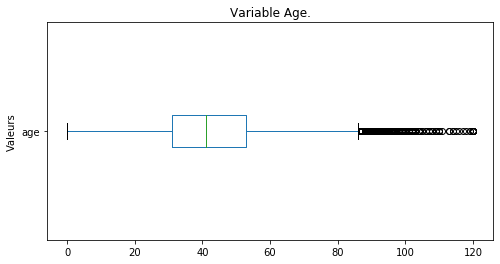

In [10]:
#Diagram de moustache

dataOriginal.boxplot(column='age', figsize=(8,4), vert=False)
plt.ylabel("Valeurs")
plt.title("Variable Age." )
plt.grid()
plt.show()

<font color='red'>There are 2944 samples with age greater than 100 ans.. to DO ???</font>

<div style="page-break-after: always;"></div>

# 3.2. Inspecting variables quantitatives - Age

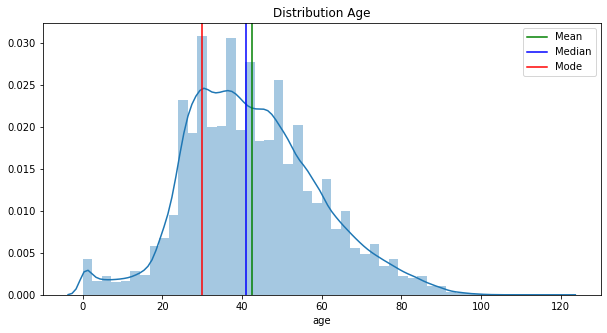

In [11]:
import seaborn as sns

mean=dataOriginal['age'].mean();
median=dataOriginal['age'].median();
mode=dataOriginal['age'].mode();
fig, ax = plt.subplots(figsize=(10,5));

sns.distplot(dataOriginal['age']);
plt.title('Distribution Age');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode')

plt.legend();

In [12]:
mean

42.62248280097847

In [13]:
mode

0    30
dtype: int64

# 2.3. Inspecting categorical variables 

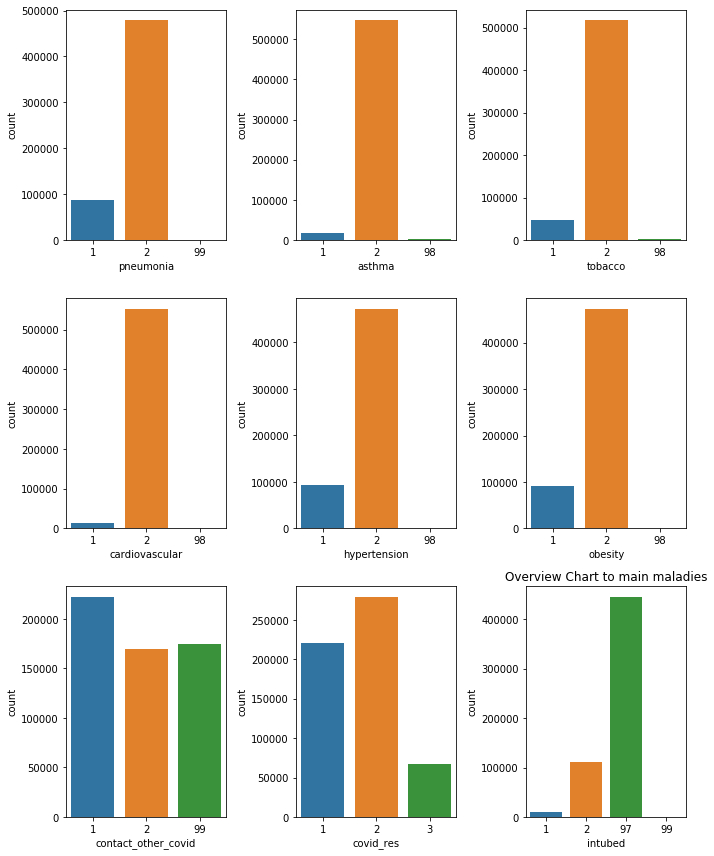

In [14]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots(3,3)
 
fig.set_size_inches(10, 12, forward=True)
plt.title("Overview Chart to main maladies")
sns.countplot(x='pneumonia', data=dataOriginal, ax=ax[0,0])
sns.countplot(x='asthma', data=dataOriginal, ax=ax[0,1])
sns.countplot(x='tobacco', data=dataOriginal, ax=ax[0,2])
sns.countplot(x='cardiovascular', data=dataOriginal, ax=ax[1,0])
sns.countplot(x='hypertension', data=dataOriginal, ax=ax[1,1])
sns.countplot(x='obesity', data=dataOriginal, ax=ax[1,2])
sns.countplot(x='contact_other_covid', data=dataOriginal, ax=ax[2,0])
sns.countplot(x='covid_res', data=dataOriginal, ax=ax[2,1])
sns.countplot(x='intubed', data=dataOriginal, ax=ax[2,2])
#fig.legend() use handles
fig.tight_layout()


## Calculate numerical values

In [15]:
pd.DataFrame(dataOriginal['pneumonia'].value_counts())

pneumonia
2      478416
1       88175
99         11

In [16]:
pd.DataFrame(dataOriginal['asthma'].value_counts())

asthma
2   546824
1    18026
98    1752

In [17]:
pd.DataFrame(dataOriginal['tobacco'].value_counts())

tobacco
2    516678
1     48017
98     1907

In [18]:
pd.DataFrame(dataOriginal['pregnancy'].value_counts())

pregnancy
97     287112
2      273840
1        4063
98       1587

## 2.3.1.  Inspecting categorical variables using bivariable relatioships with sex of patients.


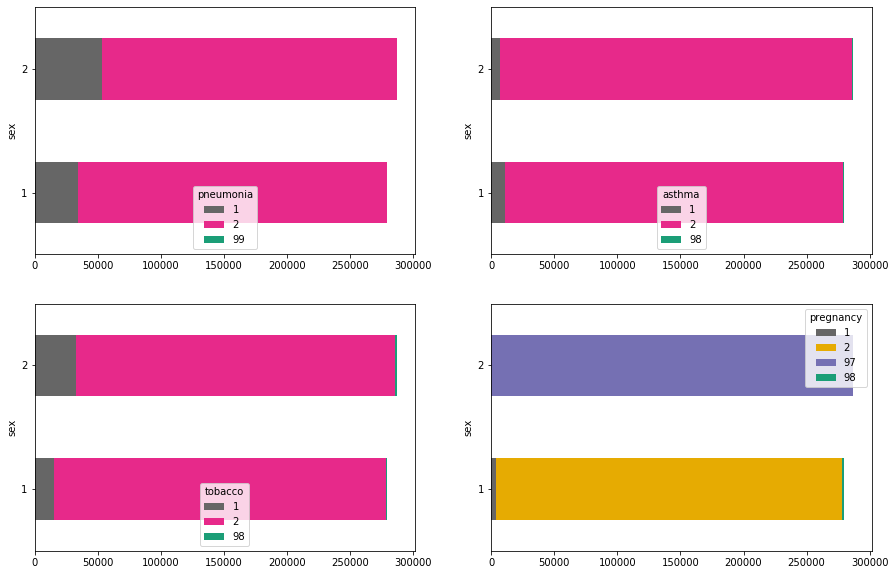

In [19]:
fig, axs = plt.subplots(2,2)

pneumonia_bySex= dataOriginal.pivot_table(index='sex', columns='pneumonia', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

asthma_bySex= dataOriginal.pivot_table(index='sex', columns='asthma', values='icu', aggfunc='count')
asthma_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

tobacco_bySex= dataOriginal.pivot_table(index='sex', columns='tobacco', values='icu', aggfunc='count')
tobacco_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])
,
pregnancy_bySex= dataOriginal.pivot_table(index='sex', columns='pregnancy', values='icu', aggfunc='count')
pregnancy_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])



## Calculate numerical values

In [20]:
pneumonia_bySex

pneumonia     1       2   99
sex                         
1          34752  244733   5
2          53423  233683   6

In [21]:
tobacco_bySex

tobacco     1       2     98
sex                         
1        15545  263171   774
2        32472  253507  1133

In [22]:
asthma_bySex

asthma     1       2     98
sex                        
1       11203  267558   729
2        6823  279266  1023

In [23]:
pregnancy_bySex

pregnancy      1         2         97      98
sex                                          
1          4063.0  273840.0       NaN  1587.0
2             NaN       NaN  287112.0     NaN

# 2.3.2. Inspecting categorical variables using bivariable relatioships with ICU (Intensive Care Medical Unit) reference

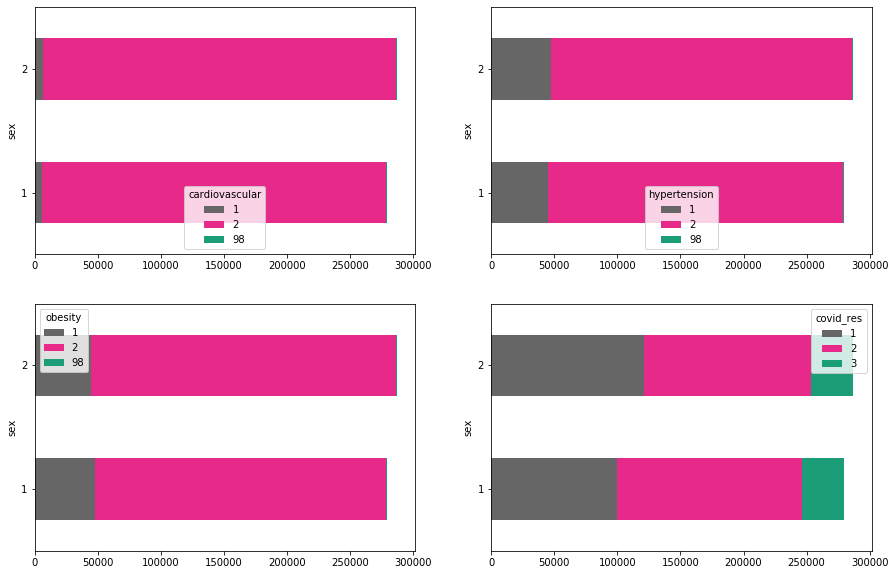

In [24]:
fig, axs = plt.subplots(2,2)

pneumonia_bySex= dataOriginal.pivot_table(index='sex', columns='cardiovascular', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

asthma_bySex= dataOriginal.pivot_table(index='sex', columns='hypertension', values='icu', aggfunc='count')
asthma_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

tobacco_bySex= dataOriginal.pivot_table(index='sex', columns='obesity', values='icu', aggfunc='count')
tobacco_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])

pregnancy_bySex= dataOriginal.pivot_table(index='sex', columns='covid_res', values='icu', aggfunc='count')
pregnancy_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])


In [25]:
pneumonia_bySex

cardiovascular    1       2     98
sex                               
1               5837  272893   760
2               6938  279112  1062

In [26]:
asthma_bySex

hypertension     1       2     98
sex                              
1             44727  234018   745
2             47781  238252  1079

In [27]:
tobacco_bySex

obesity     1       2     98
sex                         
1        47518  231235   737
2        44754  241314  1044

In [28]:
pregnancy_bySex

covid_res       1       2      3
sex                             
1           99858  146736  32896
2          120799  132299  34014

## Inspecting relationship between categorical variables - Diseases vs ICU assignation - Overview respiratory diseases

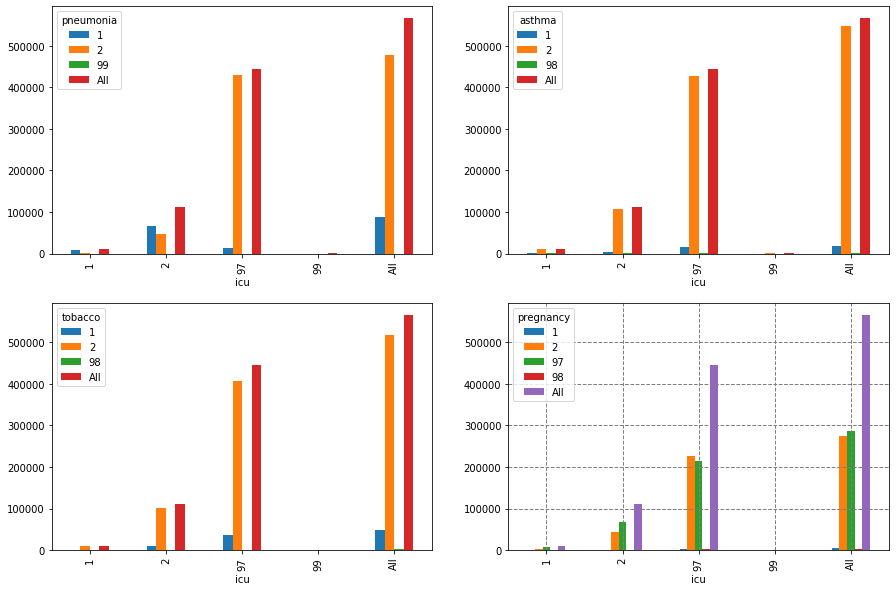

In [29]:
fig, axs = plt.subplots(2,2)
pneumonia_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['pneumonia'], 
            margins=True)
pneumonia_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
asthma_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['asthma'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
tobacco_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['tobacco'], 
            margins=True)
tobacco_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
pregnancy_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['pregnancy'], 
            margins=True)
pregnancy_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


In [30]:
pneumonia_byICU

pneumonia      1       2  99     All
icu                                 
1           8393    1719   0   10112
2          65295   46381   0  111676
97         14428  430251  10  444689
99            59      65   1     125
All        88175  478416  11  566602

In [31]:
asthma_byICU

asthma      1       2    98     All
icu                                
1         247    9751   114   10112
2        2894  108311   471  111676
97      14882  428640  1167  444689
99          3     122     0     125
All     18026  546824  1752  566602

In [32]:
tobacco_byICU

tobacco      1       2    98     All
icu                                 
1          871    9128   113   10112
2         9865  101285   526  111676
97       37272  406149  1268  444689
99           9     116     0     125
All      48017  516678  1907  566602

In [33]:
pregnancy_byICU

pregnancy     1       2      97    98     All
icu                                          
1            74    3519    6500    19   10112
2           995   44035   66499   147  111676
97         2992  226235  214041  1421  444689
99            2      51      72     0     125
All        4063  273840  287112  1587  566602

## Inspecting relationship between diseases and ICU assignation - Overview General diseases

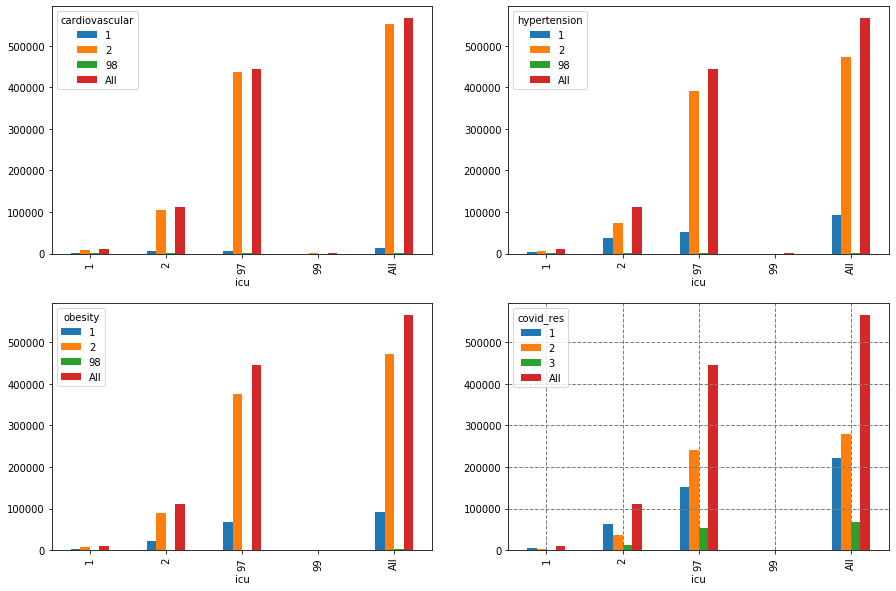

In [34]:
fig, axs = plt.subplots(2,2)
pneumonia_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['cardiovascular'], 
            margins=True)
pneumonia_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
asthma_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['hypertension'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
tobacco_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
tobacco_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
pregnancy_byICU = pd.crosstab(index=dataOriginal['icu'],
            columns=dataOriginal['covid_res'], 
            margins=True)
pregnancy_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


# 3.1.  Classes identification

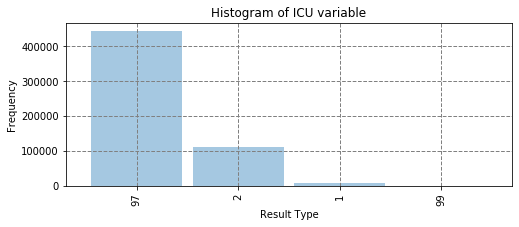

In [35]:
targetOriginal = dataOriginal['icu']
E1 = targetOriginal.value_counts()
E1.plot(kind = 'bar',
           stacked = 'True',          # Muestra las barras apiladas
           alpha = 0.4,               # nivel de transparencia
           width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
           figsize=(8,3));

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('Histogram of ICU variable')
plt.xlabel("Result Type")
plt.ylabel("Frequency")
plt.show()



In [36]:
cat_si_no

CLAVE      DESCRIPCIÓN
0      1              SI 
1      2              NO 
2     97        NO APLICA
3     98        SE IGNORA
4     99  NO ESPECIFICADO

## 3.2. Check the distribution or instances of any class

In [37]:
pd.DataFrame(targetOriginal.value_counts())

icu
97  444689
2   111676
1    10112
99     125

In [38]:
pd.DataFrame(targetOriginal.value_counts(normalize=True) * 100)

icu
97  78.483486
2   19.709779
1    1.784674
99   0.022061

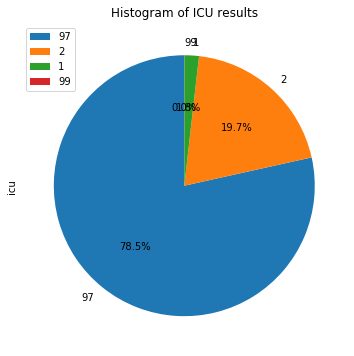

In [39]:
E2 = targetOriginal.value_counts(normalize=True)
E2.plot.pie(subplots=True, figsize = (6,6), autopct = '%1.1f%%', startangle = 90)
plt.title('Histogram of ICU results')
plt.legend(E2.index, loc = 'upper left', fontsize = 10)
plt.show() #ok


#  <font color="blue">4.  Splitting DATA to create Training and Test sets.</font>

In [3]:
# Labels for descriptors

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res']

target_column= 'icu'

model_columns = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]


In [4]:
# Split in traning and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dataOriginal[predictors], 
                                                   dataOriginal[target_column], 
                                                   test_size=0.20, random_state=44)

print("Size training set: ", X_train.shape)
print("Size test set: ", X_test.shape)



Size training set:  (453281, 18)
Size test set:  (113321, 18)


# <font color=blue>4.  IMPUTATION AND DETECTION OF NULL AND ODD VALUES.</font>

## Make transformations with mocked data in order to show competences???

<font color="red">I didnt find odd values.</font>






In [42]:
print(model_columns)

['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']


## Check for null values in the dataset

In [43]:
X_train[predictors].isnull().values.sum()

0

In [44]:
y_train.isnull().values.sum()

0

# <font color=blue> 5.  CORRELATION ANALYSIS</font>

## 5.1 Correlation Matrix

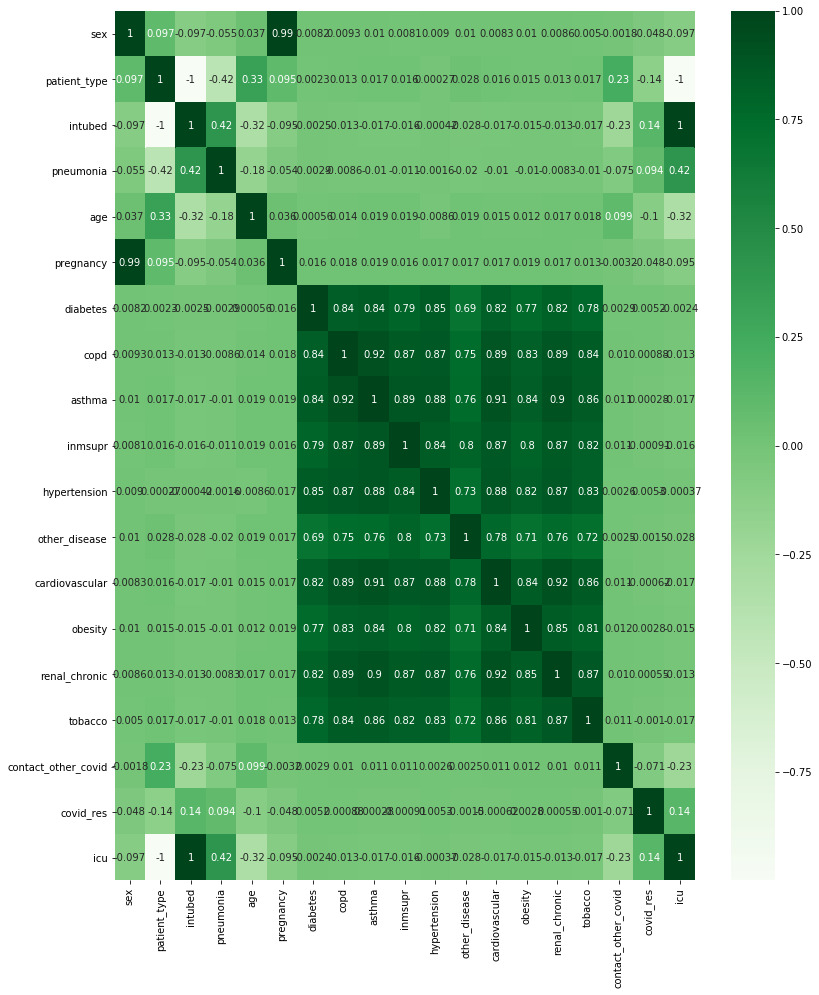

In [37]:
import seaborn as sn

#The default correlation Algorithme user is Pearson, which its not appropiate for categorical 
#variables but its interesting to see  its able to detect  dependent variables detected with Chi-squared too.

df = pd.DataFrame(dataOriginal[model_columns], columns=model_columns)
plt.figure(figsize=(13,16))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True, cmap="Greens")
plt.show()

In [38]:
df.corr()

sex  patient_type   intubed  pneumonia       age  \
sex                  1.000000      0.097025 -0.097029  -0.054758  0.036709   
patient_type         0.097025      1.000000 -0.999319  -0.420400  0.325059   
intubed             -0.097029     -0.999319  1.000000   0.421256 -0.324869   
pneumonia           -0.054758     -0.420400  0.421256   1.000000 -0.183492   
age                  0.036709      0.325059 -0.324869  -0.183492  1.000000   
pregnancy            0.994293      0.095472 -0.095481  -0.054031  0.036239   
diabetes             0.008153      0.002315 -0.002456  -0.002875  0.000556   
copd                 0.009339      0.013227 -0.013363  -0.008592  0.014440   
asthma               0.010119      0.016670 -0.016807  -0.010370  0.018668   
inmsupr              0.008096      0.016359 -0.016424  -0.010979  0.018625   
hypertension         0.009019      0.000274 -0.000419  -0.001568 -0.008617   
other_disease        0.010155      0.028232 -0.028389  -0.019541  0.018627   
cardiovascular       0.008344      0.016446 -0.016587  -0.010392  0.015049   
obesity              0.010199      0.014967 -0.015101  -0.010070  0.012068   
renal_chronic        0.008577      0.013240 -0.013384  -0.008296  0.016643   
tobacco              0.004980      0.016603 -0.016738  -0.009996  0.017531   
contact_other_covid -0.001791      0.228929 -0.228811  -0.074756  0.099339   
covid_res           -0.047575     -0.135931  0.135738   0.093832 -0.102643   
icu                 -0.097024     -0.999314  0.999989   0.421182 -0.324791   

                     pregnancy  diabetes      copd    asthma   inmsupr  \
sex                   0.994293  0.008153  0.009339  0.010119  0.008096   
patient_type          0.095472  0.002315  0.013227  0.016670  0.016359   
intubed              -0.095481 -0.002456 -0.013363 -0.016807 -0.016424   
pneumonia            -0.054031 -0.002875 -0.008592 -0.010370 -0.010979   
age                   0.036239  0.000556  0.014440  0.018668  0.018625   
pregnancy             1.000000  0.016239  0.018035  0.018931  0.016412   
diabetes              0.016239  1.000000  0.838368  0.843817  0.794140   
copd                  0.018035  0.838368  1.000000  0.922057  0.866870   
asthma                0.018931  0.843817  0.922057  1.000000  0.886307   
inmsupr               0.016412  0.794140  0.866870  0.886307  1.000000   
hypertension          0.017474  0.845727  0.872321  0.883549  0.844534   
other_disease         0.017392  0.688245  0.748066  0.756712  0.800965   
cardiovascular        0.016854  0.821716  0.893562  0.906039  0.872862   
obesity               0.018692  0.765574  0.827598  0.839128  0.804051   
renal_chronic         0.016970  0.817052  0.889774  0.901793  0.866491   
tobacco               0.013060  0.777978  0.844021  0.855136  0.821285   
contact_other_covid  -0.003185  0.002895  0.010322  0.010714  0.010554   
covid_res            -0.047589  0.005156  0.000882  0.000276 -0.000914   
icu                  -0.095474 -0.002429 -0.013308 -0.016759 -0.016299   

                     hypertension  other_disease  cardiovascular   obesity  \
sex                      0.009019       0.010155        0.008344  0.010199   
patient_type             0.000274       0.028232        0.016446  0.014967   
intubed                 -0.000419      -0.028389       -0.016587 -0.015101   
pneumonia               -0.001568      -0.019541       -0.010392 -0.010070   
age                     -0.008617       0.018627        0.015049  0.012068   
pregnancy                0.017474       0.017392        0.016854  0.018692   
diabetes                 0.845727       0.688245        0.821716  0.765574   
copd                     0.872321       0.748066        0.893562  0.827598   
asthma                   0.883549       0.756712        0.906039  0.839128   
inmsupr                  0.844534       0.800965        0.872862  0.804051   
hypertension             1.000000       0.733541        0.878630  0.821326   
other_disease            0.733541       1.000000

# 5.2.  Correlation between numerique and categorical information - Age vs diseases.

In [46]:


#ANOVA





# <font color="blue">6.  VARIABLE REDUCTION</font>

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

<font color="red"> Jai essaie Variance Tresholding, normalisation et standarisation, mais ca marche pas pour notre cas.<font>


# 6.1.  Based on exploration info 


In [72]:
# Reduce variables based on correlation

# Patient_type and intubed are the same information of icu.  We have to eliminate from dataModel.

predictors.remove('intubed')
predictors.remove('patient_type')



# 6.2.  Variances Tresholding 

<font color="red">Normalisation, Variance Tresholding and Standarisation doesnt apply for most of our model descriptors, variance its important in descriptors where means, mode distribution has significant information value.</font>


<font color="red">i did it but doesnt work well with categorical</font>

# 6.2.  Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables

The degree of association between predictor and outcome can be measured with statistics such as X2 (chi-squared) tests.


1.Define Hypothesis
Null Hypothesis (H0): Two variables are independent.
Alternate Hypothesis (H1): Two variables are not independent.

In [73]:
# Labels for descriptors

model_columns = ['sex', 'pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]



In [75]:
import scipy.stats as ss #import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),3)


cramers_v(X_train['pneumonia'], X_train['sex'])


0.085

In [76]:

cramers_v(X_train['hypertension'], X_train['obesity'])

0.593

In [77]:
model_columns

['sex',
 'pneumonia',
 'age',
 'pregnancy',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'contact_other_covid',
 'covid_res',
 'icu']

In [78]:
XY = X_train
XY['icu'] = y_train

df2 = pd.DataFrame(columns=model_columns, index=model_columns)
for i in range(len(model_columns)):
    for j in range(len(model_columns)):
      #  print("f: " + fname + "   c: "+ cname)
        fname = model_columns[i]
        cname = model_columns[j]
        df2.loc[fname, cname] = cramers_v(X_train[fname], X_train[cname])

display(df2)

sex pneumonia    age pregnancy diabetes   copd asthma  \
sex                      1     0.085  0.054         1    0.017  0.011  0.047   
pneumonia            0.085         1  0.227     0.061    0.153  0.068  0.015   
age                  0.054     0.227      1     0.067    0.255  0.157   0.03   
pregnancy                1     0.061  0.067         1    0.056  0.056  0.065   
diabetes             0.017     0.153  0.255     0.056        1  0.597  0.599   
copd                 0.011     0.068  0.157     0.056    0.597      1  0.652   
asthma               0.047     0.015   0.03     0.065    0.599  0.652      1   
inmsupr               0.01     0.048  0.054     0.053    0.565  0.614  0.628   
hypertension         0.013     0.135  0.294     0.058    0.657  0.621  0.626   
other_disease        0.027     0.041  0.058     0.051    0.488  0.529  0.535   
cardiovascular       0.014     0.057  0.123     0.055    0.588  0.634  0.642   
obesity              0.021      0.05  0.092     0.057    0.549  0.585  0.596   
renal_chronic        0.018     0.074  0.086     0.055    0.593   0.63  0.641   
tobacco              0.105     0.013  0.051     0.091    0.554  0.601   0.61   
contact_other_covid  0.049     0.131  0.123     0.042    0.078  0.041  0.016   
covid_res            0.069     0.135  0.118      0.05    0.071  0.012  0.021   
icu                  0.098     0.464   0.24     0.058    0.187  0.088   0.02   

                    inmsupr hypertension other_disease cardiovascular obesity  \
sex                    0.01        0.013         0.027          0.014   0.021   
pneumonia             0.048        0.135         0.041          0.057    0.05   
age                   0.054        0.294         0.058          0.123   0.092   
pregnancy             0.053        0.058         0.051          0.055   0.057   
diabetes              0.565        0.657         0.488          0.588   0.549   
copd                  0.614        0.621         0.529          0.634   0.585   
asthma                0.628        0.626         0.535          0.642   0.596   
inmsupr                   1        0.599         0.576          0.618    0.57   
hypertension          0.599            1          0.52          0.633   0.593   
other_disease         0.576         0.52             1           0.55     0.5   
cardiovascular        0.618        0.633          0.55              1   0.599   
obesity                0.57        0.593           0.5          0.599       1   
renal_chronic         0.619        0.632         0.541          0.654   0.602   
tobacco               0.584         0.59         0.513          0.614   0.581   
contact_other_covid   0.034        0.081         0.091          0.029   0.019   
covid_res             0.015        0.062         0.013          0.011   0.053   
icu                    0.07        0.168         0.068          0.075   0.048   

                    renal_chronic tobacco contact_other_covid covid_res    icu  
sex                         0.018   0.105               0.049     0.069  0.098  
pneumonia                   0.074   0.013               0.131     0.135  0.464  
age                         0.086   0.051               0.123     0.118   0.24  
pregnancy                   0.055   0.091               0.042      0.05  0.058  
diabetes                    0.593   0.554               0.078     0.071  0.187  
copd                         0.63   0.601               0.041     0.012  0.088  
asthma                      0.641    0.61               0.016     0.021   0.02  
inmsupr                     0.619   0.584               0.034     0.015   0.07  
hypertension                0.632    0.59               0.081     0.062  0.168  
other_disease               0.541   0.513               0.091     0.013  0.068  
cardiovascular              0.654   0.614               0.029     0.011  0.075  
obesity                     0.602   0.581               0.019     0.053  0.048  
renal_chronic                   1   0.619               0.051     0.01

In [79]:
X_train.head(5)

sex  patient_type  intubed  pneumonia  age  pregnancy  diabetes  copd  \
380621    1             1       97          2   42          2         2     2   
215435    2             2        1          1   60         97         2     2   
81577     2             1       97          2   25         97         2     2   
508482    1             1       97          2   29          2         2     2   
430578    1             1       97          2   41          2         2     2   

        asthma  inmsupr  hypertension  other_disease  cardiovascular  obesity  \
380621       2        2             2              2               2        2   
215435       2        2             2              2               2        2   
81577        2        2             2              2               2        2   
508482       2        2             2              2               2        2   
430578       2        2             2              2               2        2   

        renal_chronic  tobacco  contact_other_covid  covid_res  icu  
380621              2        1                    1          2   97  
215435              2        1                    2          1    2  
81577               2        2                    1          1   97  
508482              2        2                    1          3   97  
430578              2        2                    1          2   97

In [80]:
df2.shape

(17, 17)

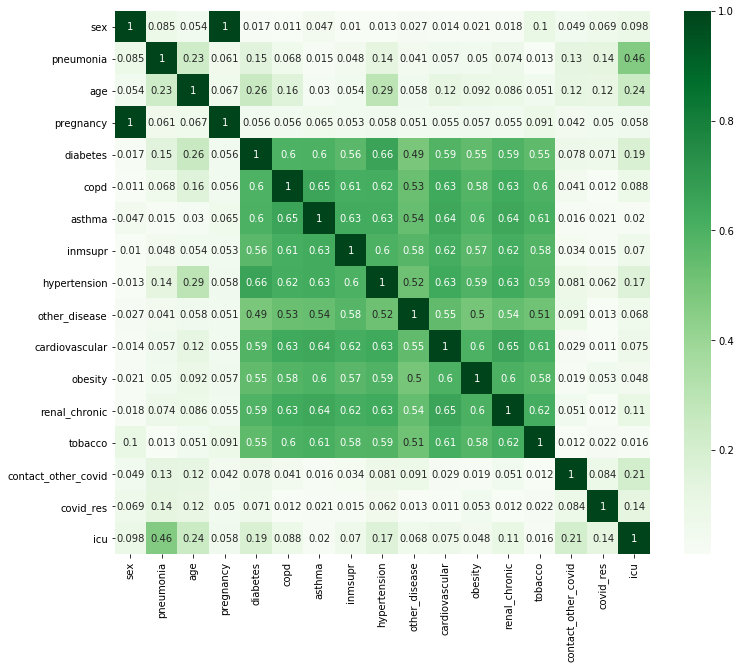

In [81]:
#df = pd.DataFrame(index=predictors, columns=predictors)
import seaborn as sns

df2 = df2.astype('float')  # !! Neccessary for Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df2, annot=True, cmap="Greens")
plt.show()

In [67]:
# TODO UTIL?

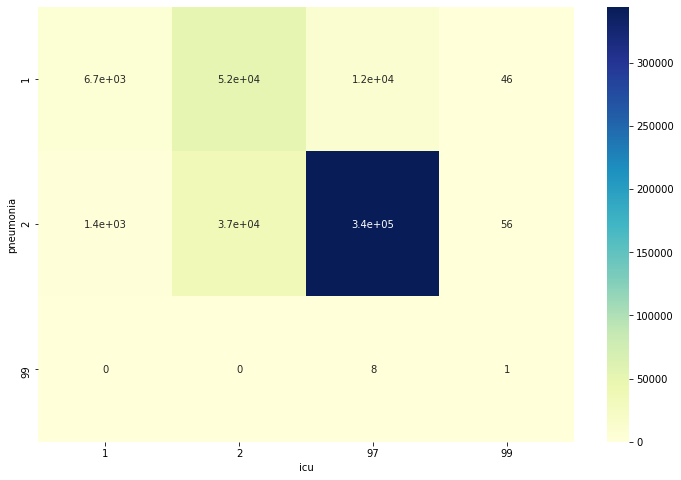

In [9]:
contigency= pd.crosstab(X_train['pneumonia'], y_train)
contigency
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

# 6.3. Componenent Analysis

# <font color="blue">7.  MODELISATION & PREDICTION</font>

In [5]:
# Define variables to eliminate and continue

predictors = ['sex','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res']

target_column= 'icu'


model_columns = ['sex','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]


# 7.1 KNN

In [6]:
from sklearn import neighbors, datasets

weights = 'uniform'
k_neighbors = 15
model1 = neighbors.KNeighborsClassifier(weights=weights)
model1.fit(X_train, y_train.values.ravel())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 7.1.1  Model Evaluation

In [7]:
# METRIQUES

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_predicted_train = model1.predict(X_train)
y_predicted_test = model1.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_predicted_test, y_test))

Accuracy: 0.9822716001447216


In [8]:
print(confusion_matrix(y_test, y_predicted_test))

[[  312  1678     0     0]
 [  314 21924     1     0]
 [    0     1 89069     0]
 [    0     1    14     7]]


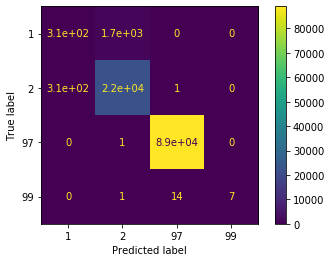

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model1, X_test, y_test)
plt.show()

In [9]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.9770914170233116


In [10]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.6151975511765166


In [11]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))


F1 score: 0.6694207066190329


## <font color="green">7.1.1. Model</font>

## <font color="green">7.1.2. Prediction</font>

# 7.2. Desicion Tree

# 7.3. Nayve Bayes

# <font color="blue">8.  CONCLUSIONS</font>